# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path
from dotenv import load_dotenv

#Load .env
from dotenv import load_dotenv

#From a set path
dotenv_path = Path('/Users/macjohnson/Documents/Challenge5/Starter_Code/.env')

load_dotenv(dotenv_path = dotenv_path)

%matplotlib inline

In [2]:
import matplotlib as plt

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28513.20
The current value of your 5.3 ETH is $8709.07


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2023-01-19', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(tickers, timeframe, start = today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=="AGG"].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_investments.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2023-01-19 05:00:00+00:00  100.73  100.73  100.33  100.50  8633859   
2023-01-20 05:00:00+00:00  100.17  100.26   99.89  100.09  6095775   
2023-01-23 05:00:00+00:00   99.80  100.06   99.78   99.84  6573365   
2023-01-24 05:00:00+00:00   99.84  100.32   99.68  100.28  6539095   
2023-01-25 05:00:00+00:00  100.26  100.47  100.10  100.40  5431037   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2023-01-19 05:00:00+00:00       23638  100.504973  389.36  391.080  387.26   
2023-01-20 05:00:00+00:00       18911  100.069086  390.10  396.040  388.38   
2023-01-23 05:00:00+00:00       20920   99.871001  396.72  402.645  395.72   
2023-01-24 05:00:00+00:00       20248  100.146289  398.88  401.150  397.64   
2023-01-25 05:00:00+00:00       21570  100.309457  395.95  400.700  393.56   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-01-19 05:00:00+00:00  388.64  87066127      549053  389.264685  
2023-01-20 05:00:00+00:00  395.88  91806356      505915  392.598891  
2023-01-23 05:00:00+00:00  400.63  84187957      568843  399.770552  
2023-01-24 05:00:00+00:00  400.20  59549719      434698  399.936054  
2023-01-25 05:00:00+00:00  400.35  84826825      583807  397.858257

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_investments['AGG']['close'][0]
spy_close_price = df_investments['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.5
Current SPY closing price: $388.64


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price 
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19432.00
The current value of your 200 AGG shares is $20100.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value, my_spy_value + my_agg_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns = ['amount'], index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

amount
crypto  37222.266
shares  39532.000

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

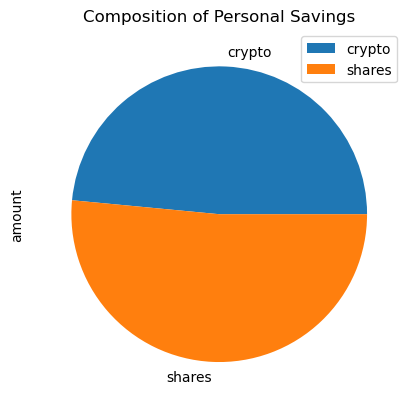

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount', title = 'Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = int(df_savings.sum())

# Validate saving health
if total_amount_savings > emergency_fund:
        print("Congrats! You have enough money in your emergency fund")
elif total_amount_savings == emergency_fund:
        print("You are cutting it close.  Increase your savings")
else:
        print("You must increase your savings")

Congrats! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-01-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-29', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
years3 = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()


df_investments = alpaca.get_bars(tickers, timeframe, start = years3).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']== "AGG"].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']== "SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-01-02 05:00:00+00:00  112.68  112.80  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.05  112.7814  113.01  3664283   
2020-01-06 05:00:00+00:00  113.13  113.13  112.8400  112.92  8131608   
2020-01-07 05:00:00+00:00  112.92  112.92  112.7800  112.80  2883005   
2020-01-08 05:00:00+00:00  112.85  112.94  112.5450  112.67  7323117   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-01-02 05:00:00+00:00       17763  112.645004  323.54  324.89  322.53   
2020-01-03 05:00:00+00:00       14453  112.958798  321.16  323.64  321.10   
2020-01-06 05:00:00+00:00       17277  112.949600  320.49  323.73  320.36   
2020-01-07 05:00:00+00:00       11523  112.834953  323.02  323.54  322.24   
2020-01-08 05:00:00+00:00       12854  112.671650  322.94  325.78  322.67   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-01-02 05:00:00+00:00  324.87  59253833      304884  323.710023  
2020-01-03 05:00:00+00:00  322.43  77783121      358500  322.791701  
2020-01-06 05:00:00+00:00  323.73  55817168      255767  322.722391  
2020-01-07 05:00:00+00:00  322.74  42874811      226059  322.711069  
2020-01-08 05:00:00+00:00  324.42  68435753      340004  324.331733

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
portfolio_data = df_stock_data,
weights = [.40, .60],
num_simulation = 500,
num_trading_days = 252*5)


In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-01-02 05:00:00+00:00  112.68  112.80  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.05  112.7814  113.01  3664283   
2020-01-06 05:00:00+00:00  113.13  113.13  112.8400  112.92  8131608   
2020-01-07 05:00:00+00:00  112.92  112.92  112.7800  112.80  2883005   
2020-01-08 05:00:00+00:00  112.85  112.94  112.5450  112.67  7323117   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-02 05:00:00+00:00       17763  112.645004          NaN  323.54   
2020-01-03 05:00:00+00:00       14453  112.958798     0.002929  321.16   
2020-01-06 05:00:00+00:00       17277  112.949600    -0.000796  320.49   
2020-01-07 05:00:00+00:00       11523  112.834953    -0.001063  323.02   
2020-01-08 05:00:00+00:00       12854  112.671650    -0.001152  322.94   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2020-01-02 05:00:00+00:00  324.89  322.53  324.87  59253833      304884   
2020-01-03 05:00:00+00:00  323.64  321.10  322.43  77783121      358500   
2020-01-06 05:00:00+00:00  323.73  320.36  323.73  55817168      255767   
2020-01-07 05:00:00+00:00  323.54  322.24  322.74  42874811      226059   
2020-01-08 05:00:00+00:00  325.78  322.67  324.42  68435753      340004   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-02 05:00:00+00:00  323.710023          NaN  
2020-01-03 05:00:00+00:00  322.791701    -0.007511  
2020-01-06 05:00:00+00:00  322.722391     0.004032  
2020-01-07 05:00:00+00:00  322.711069    -0.003058  
2020-01-08 05:00:00+00:00  324.331733     0.005205

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/macjohnson/Documents/Challenge5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991167  0.996593  0.995188  1.012426  1.009224  0.987519  1.001747   
2     0.998529  0.989343  0.997955  1.017182  0.996736  0.974946  1.000190   
3     1.007847  0.991744  1.004215  1.009907  0.990207  0.973790  0.988575   
4     0.991712  0.981602  1.007688  1.023010  0.989696  0.975287  0.986641   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.903556  1.510492  1.018717  1.364439  0.866810  1.538682  0.731683   
1257  0.906173  1.497851  1.019881  1.372638  0.866426  1.524567  0.726754   
1258  0.911768  1.499490  1.025476  1.372309  0.876790  1.497578  0.725780   
1259  0.914252  1.508184  1.029221  1.372905  0.881337  1.488626  0.739489   
1260  0.916599  1.508271  1.029170  1.358691  0.883752  1.470753  0.742527   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002587  0.985467  1.003579  ...  1.009341  1.010562  1.007175   
2     1.009274  0.975738  1.010186  ...  1.005834  1.019472  1.006163   
3     1.001742  0.975578  1.026802  ...  1.015804  1.000229  1.003909   
4     0.996932  0.981352  1.019843  ...  1.020305  0.998439  0.993928   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.829475  0.980621  1.315781  ...  1.093840  1.335433  1.868476   
1257  0.835647  0.971475  1.305009  ...  1.096627  1.327263  1.868408   
1258  0.832974  0.967888  1.309898  ...  1.086510  1.346864  1.866142   
1259  0.850403  0.951967  1.310148  ...  1.099062  1.321920  1.862953   
1260  0.851580  0.944578  1.329630  ...  1.103034  1.312831  1.891627   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.991181  0.993804  0.990762  1.002763  0.987775  0.999721  0.999508  
2     1.000841  0.981700  1.005202  0.990979  0.980052  1.012756  1.002468  
3     1.005026  0.977985  1.001665  0.976829  0.971462  1.009551  0.993939  
4     0.991036  0.989682  1.009011  0.973648  0.979942  1.015380  0.998426  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.028903  0.694654  1.823901  1.394639  1.141750  1.246813  0.839822  
1257  1.009217  0.681540  1.821156  1.415999  1.136779  1.252582  0.841503  
1258  1.008257  0.680126  1.825001  1.426476  1.129526  1.266773  0.830023  
1259  1.010144  0.673163  1.825407  1.431351  1.124335  1.264283  0.832637  
1260  1.009259  0.669625  1.813587  1.417478  1.120232  1.264002  0.844478  

[1261 rows x 500 columns]

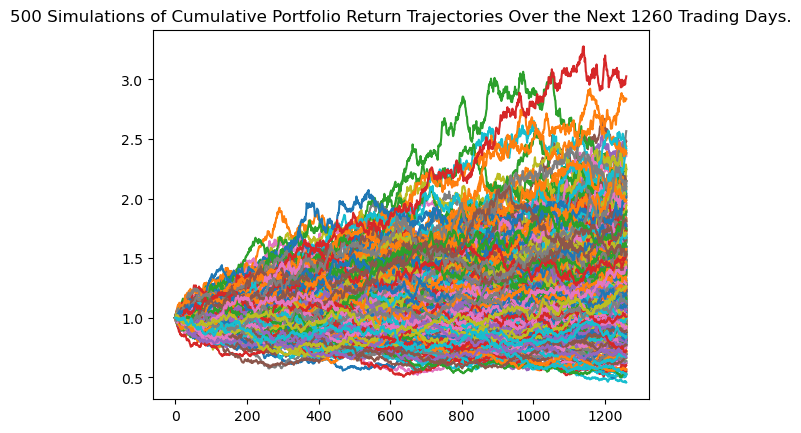

In [19]:
# Plot simulation outcomes
MCline_plot = MC_30year.plot_simulation()

MCline_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches='tight')

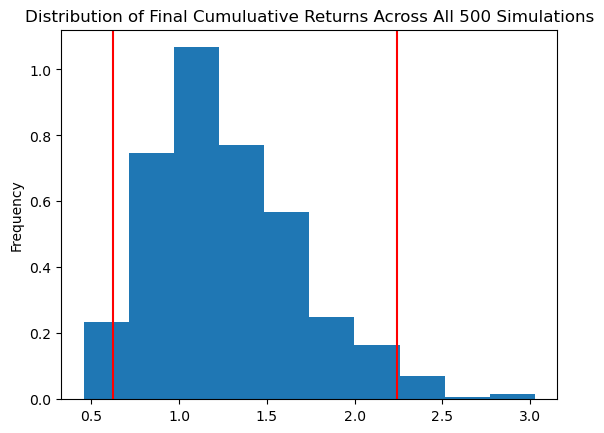

In [20]:
distribution_plot = MC_30year.plot_distribution()

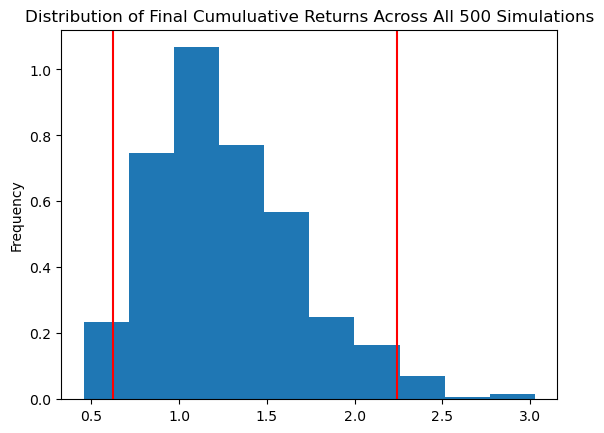

In [21]:
# Plot probability distribution and confidence intervals
MCdist_plot = MC_30year.plot_distribution()



### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
MCtbl = MC_30year.summarize_cumulative_return()

print(MCtbl)

count           500.000000
mean              1.274144
std               0.418604
min               0.458153
25%               0.971014
50%               1.198364
75%               1.536047
max               3.026055
95% CI Lower      0.623812
95% CI Upper      2.243769
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MCtbl[8]*20000,2)
ci_upper = round(MCtbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $12476.24 and $44875.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $12476.24 and $44875.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
portfolio_data = df_stock_data,
weights = [.10, .90],
num_simulation = 500,
num_trading_days = 252*5)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-01-02 05:00:00+00:00  112.68  112.80  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.05  112.7814  113.01  3664283   
2020-01-06 05:00:00+00:00  113.13  113.13  112.8400  112.92  8131608   
2020-01-07 05:00:00+00:00  112.92  112.92  112.7800  112.80  2883005   
2020-01-08 05:00:00+00:00  112.85  112.94  112.5450  112.67  7323117   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-02 05:00:00+00:00       17763  112.645004          NaN  323.54   
2020-01-03 05:00:00+00:00       14453  112.958798     0.002929  321.16   
2020-01-06 05:00:00+00:00       17277  112.949600    -0.000796  320.49   
2020-01-07 05:00:00+00:00       11523  112.834953    -0.001063  323.02   
2020-01-08 05:00:00+00:00       12854  112.671650    -0.001152  322.94   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2020-01-02 05:00:00+00:00  324.89  322.53  324.87  59253833      304884   
2020-01-03 05:00:00+00:00  323.64  321.10  322.43  77783121      358500   
2020-01-06 05:00:00+00:00  323.73  320.36  323.73  55817168      255767   
2020-01-07 05:00:00+00:00  323.54  322.24  322.74  42874811      226059   
2020-01-08 05:00:00+00:00  325.78  322.67  324.42  68435753      340004   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-02 05:00:00+00:00  323.710023          NaN  
2020-01-03 05:00:00+00:00  322.791701    -0.007511  
2020-01-06 05:00:00+00:00  322.722391     0.004032  
2020-01-07 05:00:00+00:00  322.711069    -0.003058  
2020-01-08 05:00:00+00:00  324.331733     0.005205

In [27]:
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/macjohnson/Documents/Challenge5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004587  1.006580  0.987191  0.977126  1.003621  1.000907  0.993526   
2     1.008913  0.995908  0.986953  0.979304  1.006040  0.992977  1.002541   
3     1.019845  0.992169  0.967530  0.992495  1.031217  0.982437  0.981136   
4     1.009514  1.007555  0.987510  1.001343  1.026480  0.995893  0.994427   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.402621  3.945964  1.452859  0.781177  2.407714  2.326029  1.891774   
1257  1.421518  3.868549  1.451430  0.783713  2.382081  2.306593  1.901325   
1258  1.380372  4.001013  1.423008  0.794994  2.402715  2.330222  1.862445   
1259  1.372205  4.055357  1.426166  0.809342  2.406162  2.381795  1.905581   
1260  1.371273  3.996076  1.415617  0.802160  2.386772  2.384018  1.874247   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000475  0.999769  1.006994  ...  1.018088  0.999693  0.992085   
2     1.009635  1.017821  1.020795  ...  1.036124  0.999023  1.015660   
3     1.024099  1.023968  1.007172  ...  1.038802  1.025317  1.031869   
4     1.037911  1.026566  1.018173  ...  1.033964  1.025733  1.017508   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.102643  2.267832  1.150960  ...  2.573815  1.199149  0.899235   
1257  2.086297  2.292747  1.167545  ...  2.630758  1.197804  0.906249   
1258  2.089895  2.292746  1.163346  ...  2.592682  1.197409  0.912475   
1259  2.127659  2.324338  1.147066  ...  2.581634  1.198464  0.912732   
1260  2.106416  2.316857  1.118242  ...  2.632823  1.203718  0.937657   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.001487  1.006756  1.029427  0.977104  1.007051  0.995419  1.003581  
2     0.981527  0.999921  1.031907  0.963558  0.997659  0.979967  1.001530  
3     0.998175  1.004071  1.023984  0.951155  0.999363  0.972806  1.013554  
4     0.997748  1.018060  1.016515  0.955382  0.993102  0.979777  0.998329  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.411972  2.568528  1.239137  1.056681  1.871040  0.893852  0.979674  
1257  1.394190  2.604346  1.210926  1.064139  1.853235  0.890479  0.976273  
1258  1.376791  2.572042  1.191969  1.063429  1.825448  0.872382  0.955129  
1259  1.367649  2.603477  1.191896  1.079581  1.826687  0.863463  0.954416  
1260  1.358188  2.607514  1.191974  1.072962  1.843162  0.888433  0.942841  

[1261 rows x 500 columns]

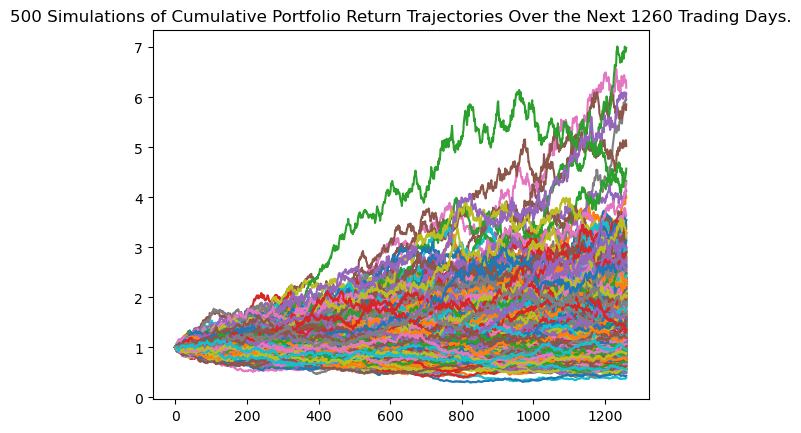

In [29]:
# Plot simulation outcomes
MC5line_plot = MC_5year.plot_simulation()

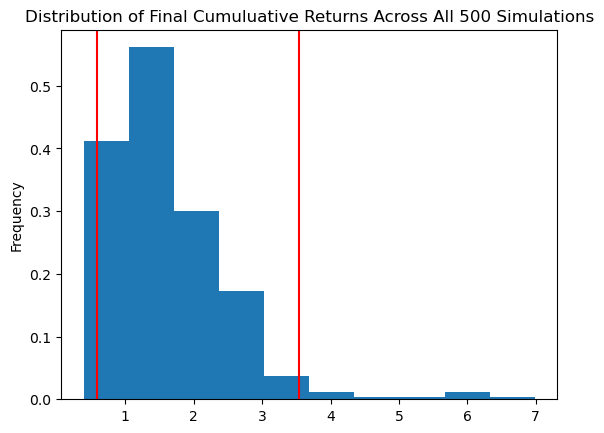

In [30]:
# Plot probability distribution and confidence intervals
MCdist_plot = MC_5year.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results

MC5tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(MC5tbl)

count           500.000000
mean              1.624998
std               0.871811
min               0.394561
25%               1.033808
50%               1.418551
75%               2.006537
max               6.987558
95% CI Lower      0.579585
95% CI Upper      3.545616
Name: 1260, dtype: float64


In [33]:
# Set initial investment
yr5_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC5tbl[8] * 60000,2)
ci_upper_five = round(MC5tbl[9] * 60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${yr5_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $34775.07 and $212736.99


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
portfolio_data = df_stock_data,
weights = [.20, .80],
num_simulation = 500,
num_trading_days = 252*5)

MC_10year

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/macjohnson/Documents/Challenge5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.027351  1.007677  1.005508  0.997257  0.990508  1.007610  1.010031   
2     1.029462  1.000665  1.005057  0.993731  0.994631  1.036091  1.004044   
3     1.027290  1.027741  0.996626  0.977557  0.996550  1.030189  1.019969   
4     1.010682  1.035408  1.004636  0.964390  1.013553  1.033486  1.030685   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.842846  0.935148  0.870225  1.587328  3.501688  0.984866  0.636679   
1257  0.836966  0.947680  0.875384  1.593130  3.530408  0.969216  0.642173   
1258  0.841486  0.950605  0.873125  1.574162  3.582188  0.967336  0.646404   
1259  0.852371  0.969785  0.864318  1.593795  3.545938  0.955547  0.649039   
1260  0.837758  0.953236  0.841638  1.597220  3.558888  0.967676  0.645767   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997018  0.998551  1.000298  ...  1.007990  0.995692  1.002290   
2     0.979658  1.014939  1.001687  ...  0.984472  0.972551  1.016705   
3     0.986433  1.024999  1.017939  ...  0.977392  0.975867  1.037172   
4     0.990887  1.038710  1.021244  ...  0.973325  0.990829  1.038216   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.574544  1.170809  1.086668  ...  3.793957  0.958433  3.054084   
1257  0.572009  1.182371  1.100763  ...  3.851848  0.970741  3.086632   
1258  0.584268  1.187696  1.095175  ...  3.923886  0.965577  3.135127   
1259  0.588708  1.191570  1.114878  ...  4.017992  0.961470  3.147139   
1260  0.586186  1.227254  1.113835  ...  3.970658  0.952228  3.136951   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007783  0.985061  0.982952  1.010185  1.019900  1.005309  0.996636  
2     1.012582  0.986842  0.976839  0.993071  1.028951  1.000002  0.998055  
3     1.032733  0.991727  0.981577  0.987514  1.027560  0.994898  0.981036  
4     1.012638  0.977552  0.973261  0.984334  1.018852  1.013154  0.978342  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.598378  2.370514  1.171401  1.546510  1.060283  1.578691  1.718551  
1257  0.604822  2.380425  1.179215  1.593344  1.055821  1.591388  1.702869  
1258  0.620864  2.309664  1.170549  1.603380  1.089051  1.617298  1.683456  
1259  0.622266  2.293327  1.146026  1.613286  1.100101  1.620285  1.704259  
1260  0.625585  2.247128  1.140057  1.622111  1.107143  1.629173  1.744193  

[1261 rows x 500 columns]

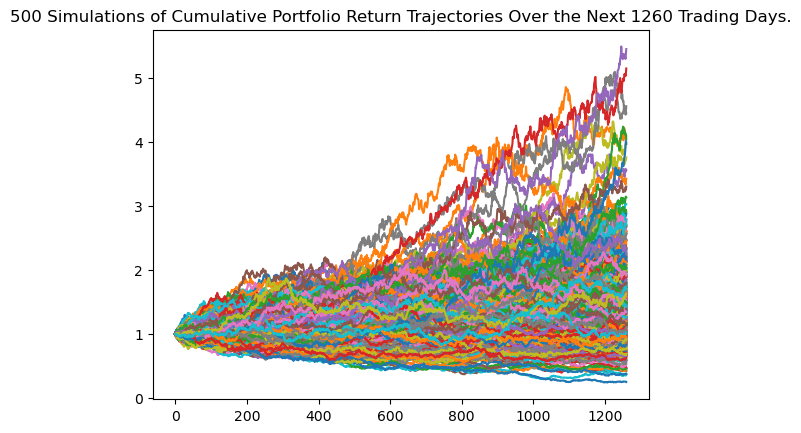

In [36]:
# Plot simulation outcomes
MC_10yearline_plot = MC_10year.plot_simulation()

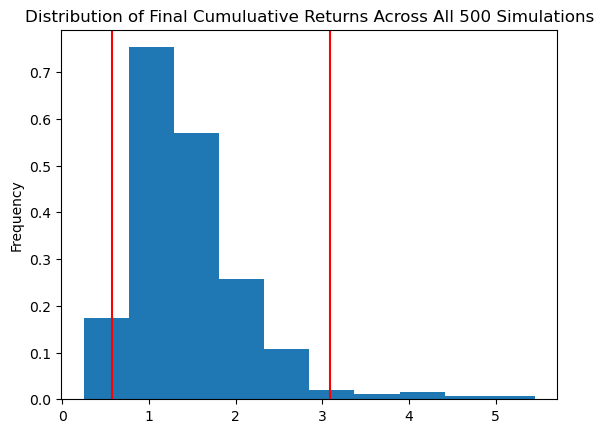

In [37]:
# Plot probability distribution and confidence intervals
MC10yr_dist_plot = MC_10year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_10tbl = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(MC_10tbl)

count           500.000000
mean              1.454531
std               0.690562
min               0.249706
25%               0.989260
50%               1.327833
75%               1.732170
max               5.454239
95% CI Lower      0.578602
95% CI Upper      3.085267
Name: 1260, dtype: float64


In [41]:
# Set initial investment
ten_yr_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_10tbl[8] * 60000,2)
ci_upper_ten = round(MC_10tbl[9] * 60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_yr_initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $34716.1 and $185116.02


## If I deposit 60k into a portfolio of 10% Bonds and 90% Stocks for 5years, I would likely have a higher return over a portfolio with 20% Bonds and 80% Stocks for 10years!